# 激活 graphlab create

In [2]:
import graphlab

# 载入房价信息

In [3]:
sales = graphlab.SFrame('home_data.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1489629213.log


This non-commercial license of GraphLab Create for academic use is assigned to y_xwang@163.com and will expire on March 13, 2018.


# 探索房屋数据

In [4]:
graphlab.canvas.set_target('ipynb')

sales.show(view="Scatter Plot", x="sqft_living", y="price")

# 建立关于 sqft_living 的简单回归模型

In [22]:
train_data, test_data = sales.random_split(.8, seed=0)

## 1.建立回归模型

In [23]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16498

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.043036     | 4336365.999378     | 2154015.621817       | 262672.861452 | 267995.181634   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

## 2.评估单特征模型

In [24]:
print sqft_model.evaluate(test_data)

{'max_error': 4133131.4124645432, 'rmse': 255214.74371849818}


## 3.展示预测结果(matplotlib)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

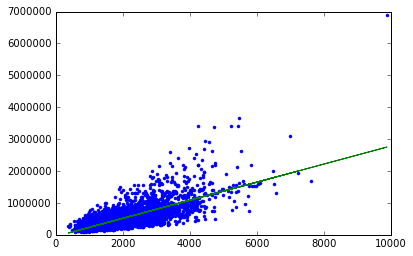

In [26]:
plt.plot(test_data['sqft_living'], test_data['price'], '.', test_data['sqft_living'], sqft_model.predict(test_data), '-')

In [27]:
print sqft_model.get('coefficients')

+-------------+-------+---------------+---------------+
|     name    | index |     value     |     stderr    |
+-------------+-------+---------------+---------------+
| (intercept) |  None | -49223.975163 | 5048.50707157 |
| sqft_living |  None | 283.224728281 |  2.2205869952 |
+-------------+-------+---------------+---------------+
[2 rows x 4 columns]



# 探索更多特征

In [33]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [34]:
sales[my_features].show()

In [36]:
my_features_model = graphlab.linear_regression.create(train_data, target='price', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16478

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.088427     | 3754563.110236     | 1440366.489067       | 181991.462839 | 182897.196164   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [37]:
print my_features_model.evaluate(test_data)

{'max_error': 3500622.0565247936, 'rmse': 179853.96603646813}


# 结果预测